In [1]:
import chollaread
import yt
import trident
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0', cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-02-08 15:18:32,740 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-02-08 15:18:32,741 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-02-08 15:18:32,741 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-02-08 15:18:32,741 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-02-08 15:18:32,742 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [4]:
def slicep(direction, ray1=False, ray2=False):
    
    get_cmap("cet_bmw")
    sl = yt.SlicePlot(ds, direction, [("density")])
    sl.set_cmap(("density"), "cet_bmw")
    
    if ray1==True:
        sl.annotate_ray(ray_, arrow=True)
    if ray2==True:
        sl.annotate_ray(ray_2, arrow=True)
    
    sl.show()

In [5]:
def spec_avg(x0, y0, z0, x, y, z, Nx, Nz,
             line, lmin, lmax,
             el=None, rom_num=None, lrest=None, gamma=None, f_value=None, amu=None,
             DIY=False, ind_p=True):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    
    for i in range(Nx):
        for j in range(Nz):
        
            ray_start = np.array([x0+(i*cu),y0,z0+(j*cu)])*k
            ray_end = np.array([x+(i*cu),y,z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=0.01)
            
            if DIY==False:
            
                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')
                
            else:
                sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None, identifier=line)

                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')

            f = np.loadtxt('spec.txt')
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
  
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Nx*Nz): # N = Nx * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
    reds = get_cmap('cet_CET_L18')
    colors = reds(np.linspace(0.25,1,Nx*Nz))
        
    fig = plt.figure(figsize=(15, 5))
    
    if ind_p==True:
        for p in range(Nx*Nz):
            plt.plot(arrays[0][0], arrays[p][1], alpha=0.5, color=colors[p])
    else:
        pass
    plt.plot(arrays[0][0], avg, color='black', label = "Average Spectrum", linewidth=1.75)
    plt.xlim(lmin, lmax)
    plt.title(line+" '140.h5.0'")
    plt.legend(fontsize='large')
    plt.xlabel('Wavelength')
    plt.ylabel('Relative Flux')
    
    return arrays[0][0], avg
    

In [25]:
def get_N(a0, a):
    return (a-a0)*256

# Slice Plot units to Projection Plot units
def stp_z(z):
    return(z*10)-5

def stp_x(x):
    return (x*10)-10

In [29]:
stp_x(1.1)

1.0

In [30]:
stp_z(0.505)

0.04999999999999982

yt : [INFO     ] 2022-02-08 16:06:13,147 Getting segment at z = 0.0: [0.53   0.2    0.2475] unitary to [0.53   0.275  0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 16:06:13,149 Getting subsegment: [0.5300000000000001 unitary, 0.20000000000000004 unitary, 0.24750000000000003 unitary] to [0.5300000000000001 unitary, 0.2750000000000001 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 16:06:13,825 Saving field data to yt dataset: ray_.h5.
yt : [INFO     ] 2022-02-08 16:06:13,905 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 16:06:13,905 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 16:06:13,905 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 16:06:13,906 Para


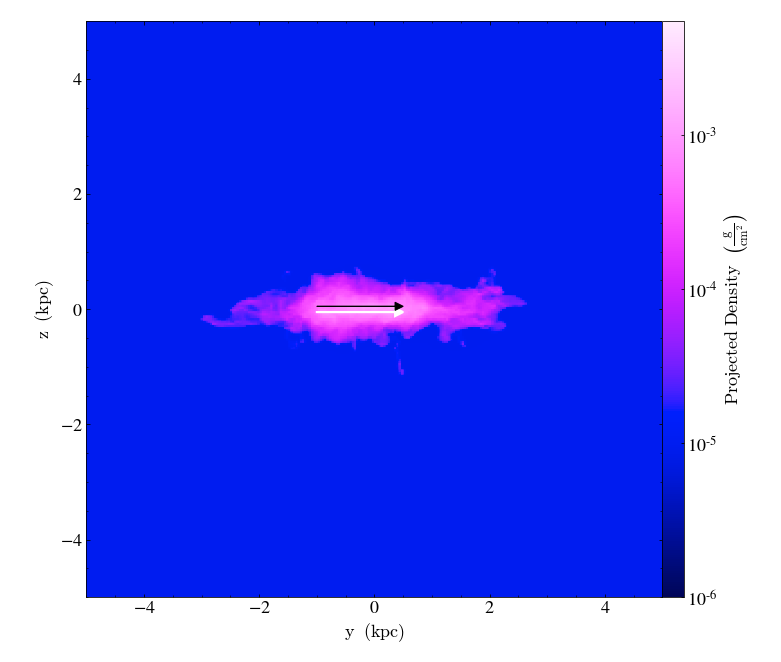

yt : [INFO     ] 2022-02-08 16:06:21,532 Projection completed
yt : [INFO     ] 2022-02-08 16:06:21,533 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-08 16:06:21,533 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-08 16:06:21,534 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-08 16:06:21,534 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-08 16:06:21,534 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: inval


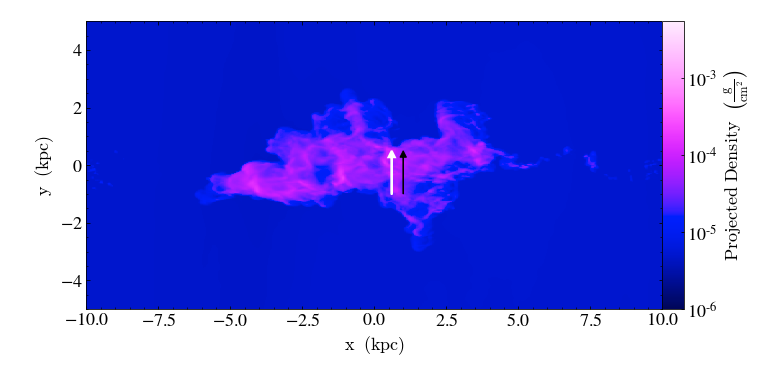

yt : [INFO     ] 2022-02-08 16:06:25,067 Projection completed
yt : [INFO     ] 2022-02-08 16:06:25,069 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-08 16:06:25,069 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-08 16:06:25,070 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-08 16:06:25,070 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-08 16:06:25,071 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The ma


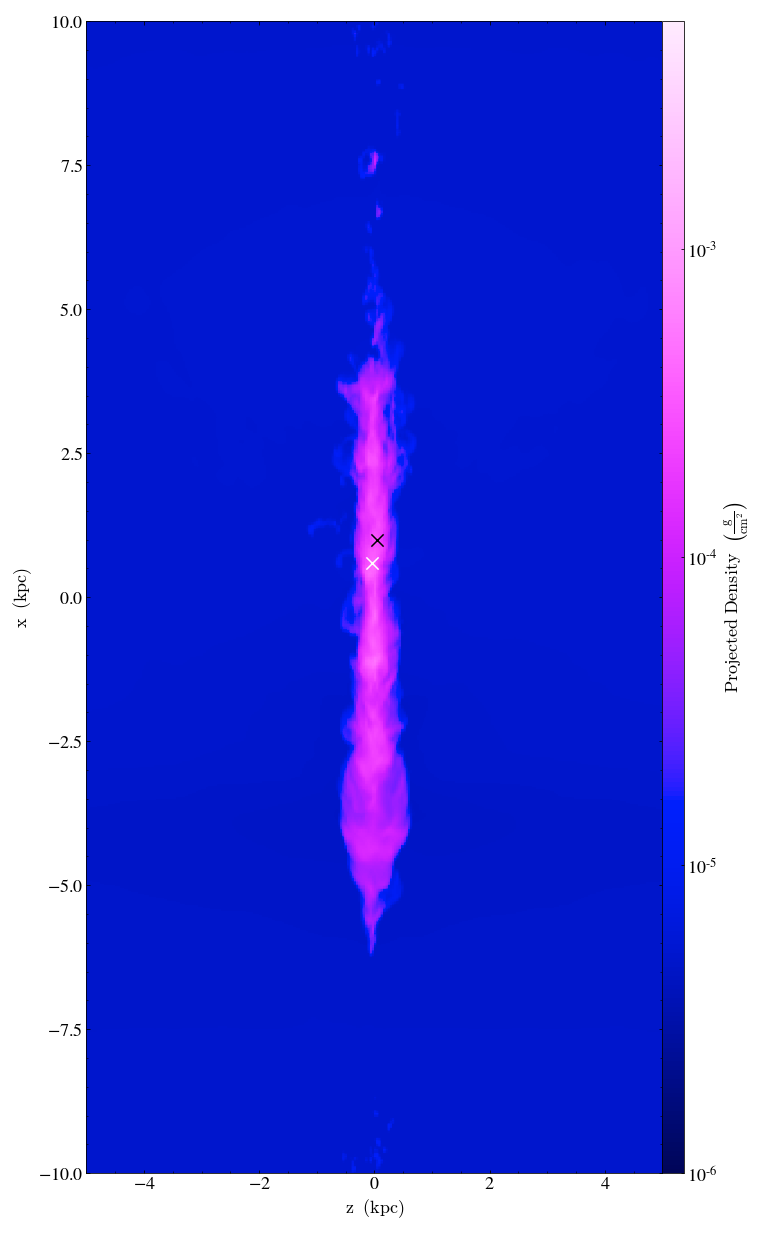

In [32]:
ray1 = make_ray(1.06,0.4,0.495,1.06,0.55,0.495)
ray2 = make_ray(1.1,0.4,0.505,1.1,0.55,0.505)

px = yt.ProjectionPlot(ds, 'x', 'density')
px.set_cmap(("density"), "cet_bmw")
px.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
px.annotate_ray(ray1, arrow=True)
px.annotate_ray(ray2, arrow=True, plot_args={"color": "black"})
px.show()

pz = yt.ProjectionPlot(ds, 'z', 'density')
pz.set_cmap(("density"), "cet_bmw")
pz.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
pz.annotate_ray(ray1, arrow=True)
pz.annotate_ray(ray2, arrow=True, plot_args={"color": "black"})
pz.show()

py = yt.ProjectionPlot(ds, 'y', 'density')
py.set_cmap(("density"), "cet_bmw")
py.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
py.annotate_marker((-0.05,0.6), coord_system="plot", plot_args={"color":"white", "s": 150})
py.annotate_marker((0.05, 1), coord_system="plot", plot_args={"color":"black", "s": 150})
py.show()

In [8]:
N_x = get_N(1.06,1.1)
N_z = get_N(0.495,0.505)

print('x:', N_x)
print('z:', N_z)

x: 10.240000000000009
z: 2.5600000000000023


## C IV

yt : [INFO     ] 2022-02-08 15:19:10,633 Getting segment at z = 0.0: [0.53   0.175  0.2475] unitary to [0.53   0.3    0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 15:19:10,636 Getting subsegment: [0.5300000000000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5300000000000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:19:11,326 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:19:11,405 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:19:11,405 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:19:11,405 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:19:11,406 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 15:19:15,303 Getting segment at z = 0.0: [0.53195313 0.175      0.25140625] unitary to [0.53195313 0.3        0.25140625] unitary.
yt : [INFO     ] 2022-02-08 15:19:15,305 Getting subsegment: [0.531953125 unitary, 0.175 unitary, 0.25140625 unitary] to [0.531953125 unitary, 0.3 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 15:19:15,954 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:19:16,032 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:19:16,033 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:19:16,033 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:19:16,033 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:19:16,034 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:19:16,035 Setting instrument to Custom
yt : [INFO    

yt : [INFO     ] 2022-02-08 15:19:19,857 Getting subsegment: [0.5358593750000001 unitary, 0.175 unitary, 0.249453125 unitary] to [0.5358593750000001 unitary, 0.3 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 15:19:20,491 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:19:20,568 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:19:20,569 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:19:20,569 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:19:20,569 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:19:20,570 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:19:20,571 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:19:20,581 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:19:20,586 Identified 5

yt : [INFO     ] 2022-02-08 15:19:25,035 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:19:25,110 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:19:25,111 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:19:25,111 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:19:25,111 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:19:25,112 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:19:25,113 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:19:25,122 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:19:25,126 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:19:25,210 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:19:25,213 Creating spectrum
Addi

yt : [INFO     ] 2022-02-08 15:19:29,560 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:19:29,560 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:19:29,561 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:19:29,561 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:19:29,562 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:19:29,572 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:19:29,575 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:19:29,659 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:19:29,662 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 65/65 [00:00<00:00, 6085.62it/s]
yt : [INFO     ] 2022-02-08 15:19:29,712 Writing spectrum to ascii file: spec.txt.
yt : 

yt : [INFO     ] 2022-02-08 15:19:33,917 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:19:33,917 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:19:33,918 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:19:33,928 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:19:33,932 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:19:34,071 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:19:34,074 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 65/65 [00:00<00:00, 5244.90it/s]
yt : [INFO     ] 2022-02-08 15:19:34,126 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:19:34,141 Getting segment at z = 0.0: [0.545625   0.175      0.25140625] unitary to [0.545625   0.3        0.25140625] unitary.
yt : [INFO     ] 2022-02-08 15:19:34,14

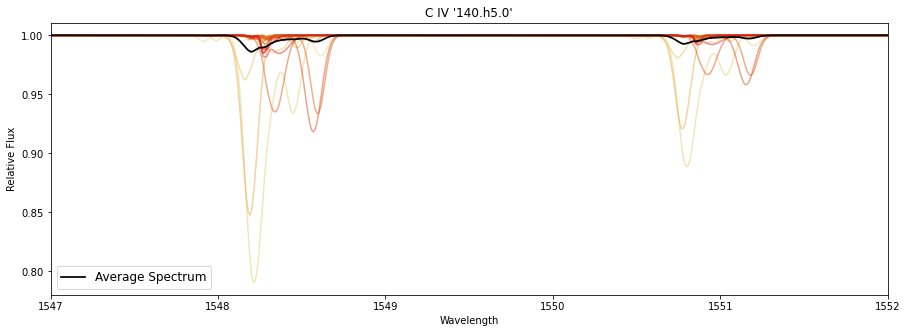

In [9]:
CIV = spec_avg(1.06,0.35,0.495,1.06,0.6,0.495, 10,3, 'C IV' ,1547,1552)

## Ly a

yt : [INFO     ] 2022-02-08 15:20:01,226 Getting segment at z = 0.0: [0.53   0.175  0.2475] unitary to [0.53   0.3    0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 15:20:01,228 Getting subsegment: [0.5300000000000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5300000000000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:20:01,881 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:20:01,957 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:20:01,957 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:20:01,957 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:20:01,958 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 15:20:07,004 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:20:07,031 Getting segment at z = 0.0: [0.53195313 0.175      0.25140625] unitary to [0.53195313 0.3        0.25140625] unitary.
yt : [INFO     ] 2022-02-08 15:20:07,032 Getting subsegment: [0.531953125 unitary, 0.175 unitary, 0.25140625 unitary] to [0.531953125 unitary, 0.3 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 15:20:07,664 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:20:07,740 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:20:07,741 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:20:07,741 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:20:07,742 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:20:07,742 Parameters: cosmological_simulation   = 0.0
y

yt : [INFO     ] 2022-02-08 15:20:12,925 Getting subsegment: [0.5358593750000001 unitary, 0.175 unitary, 0.249453125 unitary] to [0.5358593750000001 unitary, 0.3 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 15:20:13,559 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:20:13,635 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:20:13,635 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:20:13,635 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:20:13,636 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:20:13,636 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:20:13,637 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:20:13,647 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:20:13,651 Identified 5

yt : [INFO     ] 2022-02-08 15:20:19,449 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:20:19,524 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:20:19,524 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:20:19,525 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:20:19,525 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:20:19,525 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:20:19,526 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:20:19,536 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:20:19,541 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:20:19,625 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:20:19,627 Creating spectrum
Adding 

yt : [INFO     ] 2022-02-08 15:20:25,224 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:20:25,224 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:20:25,224 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:20:25,225 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:20:25,225 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:20:25,226 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:20:25,236 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:20:25,240 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:20:25,386 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:20:25,389 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 65/65 [00:00<00:00, 236.59it/s]
yt

yt : [INFO     ] 2022-02-08 15:20:30,934 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:20:30,934 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:20:30,935 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:20:30,935 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:20:30,945 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:20:30,949 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:20:31,034 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:20:31,036 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 65/65 [00:00<00:00, 264.46it/s]
yt : [INFO     ] 2022-02-08 15:20:31,313 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-02-08 15:20:31,313 Writing spectrum to ascii file: s

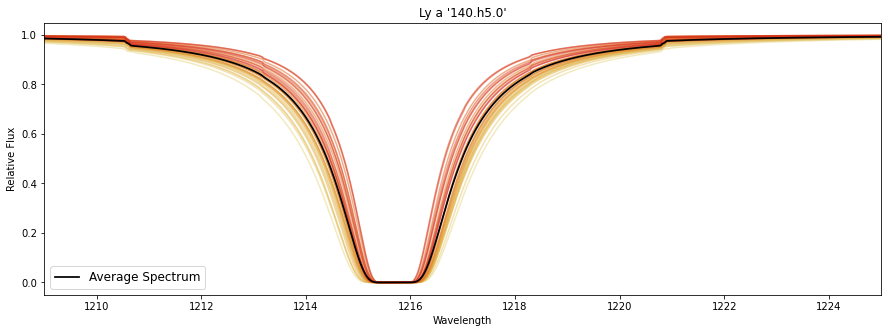

In [10]:
HI = spec_avg(1.06,0.35,0.495,1.06,0.6,0.495, 10,3, 'Ly a' ,1209,1225)

## O I 1302

yt : [INFO     ] 2022-02-08 15:20:36,106 Getting segment at z = 0.0: [0.53   0.175  0.2475] unitary to [0.53   0.3    0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 15:20:36,107 Getting subsegment: [0.5300000000000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5300000000000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:20:36,736 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:20:36,822 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:20:36,822 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:20:36,822 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:20:36,823 Parameters: domain_right_edge     

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2972.38it/s]
yt : [INFO     ] 2022-02-08 15:20:39,680 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:20:39,692 Getting segment at z = 0.0: [0.53195313 0.175      0.2475    ] unitary to [0.53195313 0.3        0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 15:20:39,693 Getting subsegment: [0.531953125 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.531953125 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:20:40,352 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:20:40,431 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:20:40,431 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:20:40,432 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:20:40,432 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2987.69it/s]
yt : [INFO     ] 2022-02-08 15:20:43,134 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:20:43,145 Getting segment at z = 0.0: [0.53390625 0.175      0.2475    ] unitary to [0.53390625 0.3        0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 15:20:43,146 Getting subsegment: [0.53390625 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.53390625 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:20:43,786 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:20:43,861 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:20:43,862 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:20:43,862 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:20:43,862 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.0

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2824.77it/s]
yt : [INFO     ] 2022-02-08 15:20:46,503 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:20:46,514 Getting segment at z = 0.0: [0.53585938 0.175      0.2475    ] unitary to [0.53585938 0.3        0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 15:20:46,515 Getting subsegment: [0.5358593750000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5358593750000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:20:47,144 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:20:47,223 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:20:47,224 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:20:47,224 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:20:47,225 Parameters: domain_right_edge         = [6.172e+

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2979.46it/s]
yt : [INFO     ] 2022-02-08 15:20:49,966 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:20:49,977 Getting segment at z = 0.0: [0.5378125 0.175     0.2475   ] unitary to [0.5378125 0.3       0.2475   ] unitary.
yt : [INFO     ] 2022-02-08 15:20:49,978 Getting subsegment: [0.5378125 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5378125 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:20:50,605 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:20:50,681 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:20:50,682 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:20:50,682 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:20:50,682 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] 

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2904.64it/s]
yt : [INFO     ] 2022-02-08 15:20:53,341 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:20:53,352 Getting segment at z = 0.0: [0.53976563 0.175      0.2475    ] unitary to [0.53976563 0.3        0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 15:20:53,353 Getting subsegment: [0.539765625 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.539765625 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:20:53,969 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:20:54,048 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:20:54,049 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:20:54,049 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:20:54,050 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2834.58it/s]
yt : [INFO     ] 2022-02-08 15:20:56,799 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:20:56,810 Getting segment at z = 0.0: [0.54171875 0.175      0.2475    ] unitary to [0.54171875 0.3        0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 15:20:56,811 Getting subsegment: [0.5417187500000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5417187500000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:20:57,444 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:20:57,521 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:20:57,521 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:20:57,522 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:20:57,522 Parameters: domain_right_edge         = [6.172e+

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2952.10it/s]
yt : [INFO     ] 2022-02-08 15:21:00,186 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:21:00,197 Getting segment at z = 0.0: [0.54367188 0.175      0.2475    ] unitary to [0.54367188 0.3        0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 15:21:00,198 Getting subsegment: [0.543671875 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.543671875 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:21:00,819 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:21:00,895 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:21:00,895 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:21:00,895 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:21:00,896 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2951.85it/s]
yt : [INFO     ] 2022-02-08 15:21:03,624 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:21:03,634 Getting segment at z = 0.0: [0.545625 0.175    0.2475  ] unitary to [0.545625 0.3      0.2475  ] unitary.
yt : [INFO     ] 2022-02-08 15:21:03,635 Getting subsegment: [0.545625 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.545625 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:21:04,258 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:21:04,337 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:21:04,337 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:21:04,338 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:21:04,338 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_len

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 65/65 [00:00<00:00, 3001.74it/s]
yt : [INFO     ] 2022-02-08 15:21:06,966 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:21:06,976 Getting segment at z = 0.0: [0.54757813 0.175      0.2475    ] unitary to [0.54757813 0.3        0.2475    ] unitary.
yt : [INFO     ] 2022-02-08 15:21:06,977 Getting subsegment: [0.5475781250000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5475781250000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:21:07,595 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:21:07,675 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:21:07,676 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:21:07,676 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:21:07,676 Parameters: domain_right_edge         = [6.172e+

Adding line - O I 922 [922.008000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2829.28it/s]
yt : [INFO     ] 2022-02-08 15:21:10,334 Writing spectrum to ascii file: spec.txt.


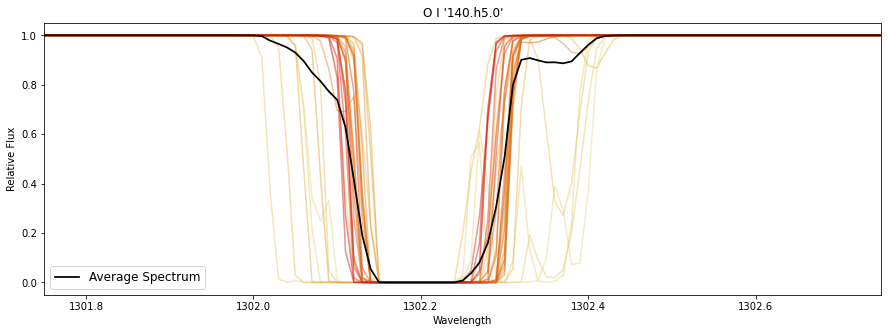

In [11]:
OI1302 = spec_avg(1.06,0.35,0.495,1.06,0.6,0.495, 10,3, 'O I' ,1301.75,1302.75)

## Si II 1304

yt : [INFO     ] 2022-02-08 15:21:10,472 Getting segment at z = 0.0: [0.53   0.175  0.2475] unitary to [0.53   0.3    0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 15:21:10,474 Getting subsegment: [0.5300000000000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5300000000000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:21:11,087 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:21:11,163 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:21:11,164 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:21:11,164 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:21:11,164 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 15:21:16,635 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:21:16,636 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:21:16,636 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:21:16,636 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:21:16,637 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:21:16,638 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:21:16,648 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:21:16,651 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:21:16,795 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:21:16,798 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 65/65 [00:00<00:00, 1545

yt : [INFO     ] 2022-02-08 15:21:21,080 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:21:21,166 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:21:21,169 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 65/65 [00:00<00:00, 1554.31it/s]
yt : [INFO     ] 2022-02-08 15:21:21,240 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:21:21,251 Getting segment at z = 0.0: [0.53585938 0.175      0.25140625] unitary to [0.53585938 0.3        0.25140625] unitary.
yt : [INFO     ] 2022-02-08 15:21:21,252 Getting subsegment: [0.5358593750000001 unitary, 0.175 unitary, 0.25140625 unitary] to [0.5358593750000001 unitary, 0.3 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 15:21:21,877 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:21:21,955 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:21:21,955 Parameters: 

yt : [INFO     ] 2022-02-08 15:21:26,481 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:21:26,558 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:21:26,558 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:21:26,559 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:21:26,559 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:21:26,559 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:21:26,561 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:21:26,571 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:21:26,575 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:21:26,660 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:21:26,662 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 15:21:30,999 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:21:31,009 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:21:31,013 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:21:31,097 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:21:31,100 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 65/65 [00:00<00:00, 1716.08it/s]
yt : [INFO     ] 2022-02-08 15:21:31,166 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:21:31,177 Getting segment at z = 0.0: [0.54367188 0.175      0.24945312] unitary to [0.54367188 0.3        0.24945312] unitary.
yt : [INFO     ] 2022-02-08 15:21:31,178 Getting subsegment: [0.543671875 unitary, 0.175 unitary, 0.249453125 unitary] to [0.543671875 unitary, 0.3 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 15:21:31,785 Saving field data to yt dat

yt : [INFO     ] 2022-02-08 15:21:35,565 Getting subsegment: [0.5475781250000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5475781250000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:21:36,168 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:21:36,244 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:21:36,244 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:21:36,245 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:21:36,245 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:21:36,245 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:21:36,246 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:21:36,256 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:21:36,

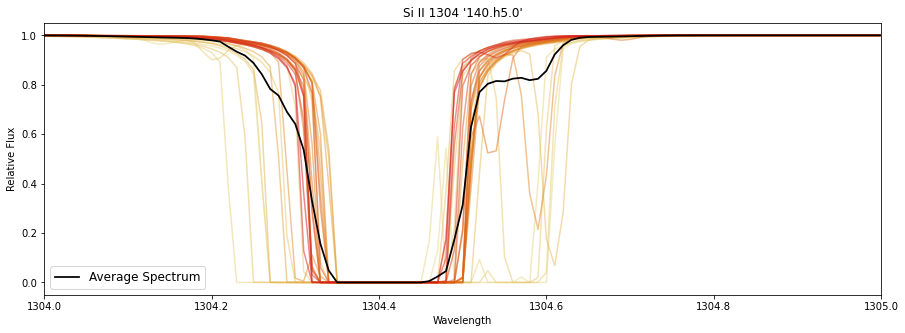

In [12]:
Si1304 = spec_avg(1.06,0.35,0.495,1.06,0.6,0.495, 10,3, 'Si II 1304' ,1304,1305)

## C II 1335

yt : [INFO     ] 2022-02-08 15:22:18,683 Getting segment at z = 0.0: [0.53   0.175  0.2475] unitary to [0.53   0.3    0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 15:22:18,686 Getting subsegment: [0.5300000000000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5300000000000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:22:19,325 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:22:19,401 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:22:19,401 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:22:19,402 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:22:19,402 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 15:22:23,839 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:22:23,840 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:22:23,840 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:22:23,840 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:22:23,841 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:22:23,842 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:22:23,851 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:22:23,855 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:22:23,942 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:22:23,945 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2315.6

yt : [INFO     ] 2022-02-08 15:22:28,336 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:22:28,421 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:22:28,424 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2241.32it/s]
yt : [INFO     ] 2022-02-08 15:22:28,481 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:22:28,492 Getting segment at z = 0.0: [0.53585938 0.175      0.25140625] unitary to [0.53585938 0.3        0.25140625] unitary.
yt : [INFO     ] 2022-02-08 15:22:28,493 Getting subsegment: [0.5358593750000001 unitary, 0.175 unitary, 0.25140625 unitary] to [0.5358593750000001 unitary, 0.3 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 15:22:29,127 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:22:29,205 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:22:29,206 Parameters: do

yt : [INFO     ] 2022-02-08 15:22:33,617 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:22:33,695 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:22:33,696 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:22:33,696 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:22:33,697 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:22:33,697 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:22:33,698 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:22:33,708 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:22:33,712 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:22:33,862 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:22:33,865 Creating spectrum
Addi

yt : [INFO     ] 2022-02-08 15:22:38,192 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:22:38,203 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:22:38,206 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:22:38,290 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:22:38,293 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2172.54it/s]
yt : [INFO     ] 2022-02-08 15:22:38,351 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:22:38,362 Getting segment at z = 0.0: [0.54367188 0.175      0.24945312] unitary to [0.54367188 0.3        0.24945312] unitary.
yt : [INFO     ] 2022-02-08 15:22:38,363 Getting subsegment: [0.543671875 unitary, 0.175 unitary, 0.249453125 unitary] to [0.543671875 unitary, 0.3 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 15:22:39,001 Saving field data to yt datas

yt : [INFO     ] 2022-02-08 15:22:42,839 Getting subsegment: [0.5475781250000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5475781250000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:22:43,466 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:22:43,541 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:22:43,541 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:22:43,542 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:22:43,542 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:22:43,542 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:22:43,544 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:22:43,554 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:22:43,

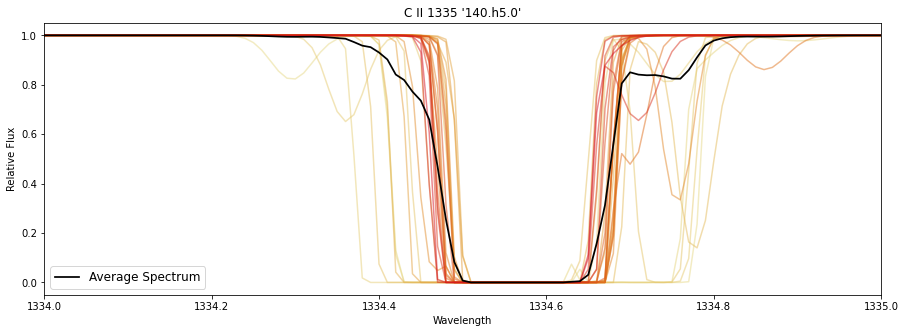

In [13]:
CII1335 = spec_avg(1.06,0.35,0.495,1.06,0.6,0.495, 10,3, 'C II 1335' ,1334,1335)

## Si IV 1393

yt : [INFO     ] 2022-02-08 15:22:52,166 Getting segment at z = 0.0: [0.53   0.175  0.2475] unitary to [0.53   0.3    0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 15:22:52,169 Getting subsegment: [0.5300000000000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5300000000000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:22:52,824 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:22:52,900 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:22:52,901 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:22:52,901 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:22:52,901 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 15:22:57,275 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:22:57,275 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:22:57,275 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:22:57,276 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:22:57,276 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:22:57,277 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:22:57,287 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:22:57,291 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:22:57,377 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:22:57,380 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 65/65 [00:00<00:00, 3344

yt : [INFO     ] 2022-02-08 15:23:01,703 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:23:01,788 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:23:01,791 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 65/65 [00:00<00:00, 3253.92it/s]
yt : [INFO     ] 2022-02-08 15:23:01,839 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:23:01,850 Getting segment at z = 0.0: [0.53585938 0.175      0.25140625] unitary to [0.53585938 0.3        0.25140625] unitary.
yt : [INFO     ] 2022-02-08 15:23:01,851 Getting subsegment: [0.5358593750000001 unitary, 0.175 unitary, 0.25140625 unitary] to [0.5358593750000001 unitary, 0.3 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 15:23:02,493 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:23:02,572 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:23:02,572 Parameters: 

yt : [INFO     ] 2022-02-08 15:23:06,933 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:23:07,014 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:23:07,014 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:23:07,015 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:23:07,015 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:23:07,015 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:23:07,016 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:23:07,028 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:23:07,032 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:23:07,120 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:23:07,123 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 15:23:11,556 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:23:11,566 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:23:11,569 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:23:11,656 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:23:11,660 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 65/65 [00:00<00:00, 3239.00it/s]
yt : [INFO     ] 2022-02-08 15:23:11,709 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:23:11,721 Getting segment at z = 0.0: [0.54367188 0.175      0.24945312] unitary to [0.54367188 0.3        0.24945312] unitary.
yt : [INFO     ] 2022-02-08 15:23:11,722 Getting subsegment: [0.543671875 unitary, 0.175 unitary, 0.249453125 unitary] to [0.543671875 unitary, 0.3 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 15:23:12,361 Saving field data to yt dat

yt : [INFO     ] 2022-02-08 15:23:16,169 Getting subsegment: [0.5475781250000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5475781250000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:23:16,803 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:23:16,878 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:23:16,878 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:23:16,879 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:23:16,879 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:23:16,879 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:23:16,880 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:23:16,890 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:23:16,

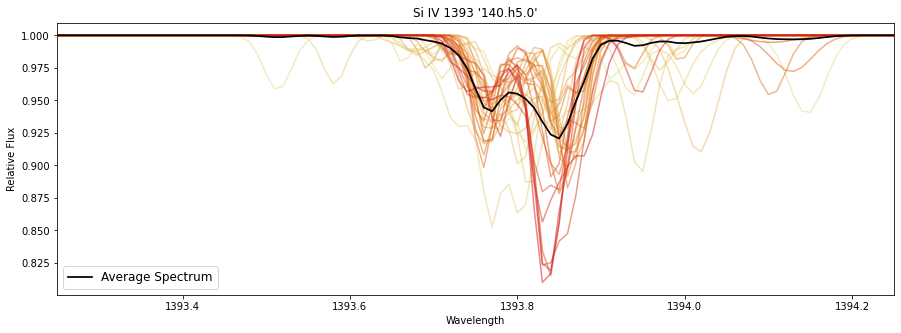

In [14]:
SiIV1393 = spec_avg(1.06,0.35,0.495,1.06,0.6,0.495, 10,3, 'Si IV 1393',1393.25,1394.25,
                   el='Si', rom_num='IV', lrest=1393.76, gamma=9.0E+8, f_value=5.24E-01, 
                   amu=28.08,DIY=True)

## Al III 1854

yt : [INFO     ] 2022-02-08 15:39:00,413 Getting segment at z = 0.0: [0.53   0.175  0.2475] unitary to [0.53   0.3    0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 15:39:00,415 Getting subsegment: [0.5300000000000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5300000000000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:39:01,041 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:39:01,119 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:39:01,120 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:39:01,120 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:39:01,120 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 15:39:05,552 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:39:05,553 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:39:05,553 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:39:05,554 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:39:05,554 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:39:05,555 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:39:05,564 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:39:05,568 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:39:05,652 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:39:05,655 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 65/65 [00:00<00:00, 279

yt : [INFO     ] 2022-02-08 15:39:10,031 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:39:10,119 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:39:10,122 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2875.20it/s]
yt : [INFO     ] 2022-02-08 15:39:10,177 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:39:10,188 Getting segment at z = 0.0: [0.53585938 0.175      0.25140625] unitary to [0.53585938 0.3        0.25140625] unitary.
yt : [INFO     ] 2022-02-08 15:39:10,189 Getting subsegment: [0.5358593750000001 unitary, 0.175 unitary, 0.25140625 unitary] to [0.5358593750000001 unitary, 0.3 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 15:39:10,825 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:39:10,900 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:39:10,901 Parameters:

yt : [INFO     ] 2022-02-08 15:39:15,240 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:39:15,316 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:39:15,316 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:39:15,317 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:39:15,317 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:39:15,317 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:39:15,318 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:39:15,328 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:39:15,332 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:39:15,417 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:39:15,420 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 15:39:19,754 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:39:19,764 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:39:19,768 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:39:19,857 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:39:19,860 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2962.92it/s]
yt : [INFO     ] 2022-02-08 15:39:19,913 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:39:19,924 Getting segment at z = 0.0: [0.54367188 0.175      0.24945312] unitary to [0.54367188 0.3        0.24945312] unitary.
yt : [INFO     ] 2022-02-08 15:39:19,925 Getting subsegment: [0.543671875 unitary, 0.175 unitary, 0.249453125 unitary] to [0.543671875 unitary, 0.3 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 15:39:20,645 Saving field data to yt da

yt : [INFO     ] 2022-02-08 15:39:24,444 Getting subsegment: [0.5475781250000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5475781250000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:39:25,084 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:39:25,162 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:39:25,162 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:39:25,162 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:39:25,163 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:39:25,163 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:39:25,164 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:39:25,175 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:39:25,

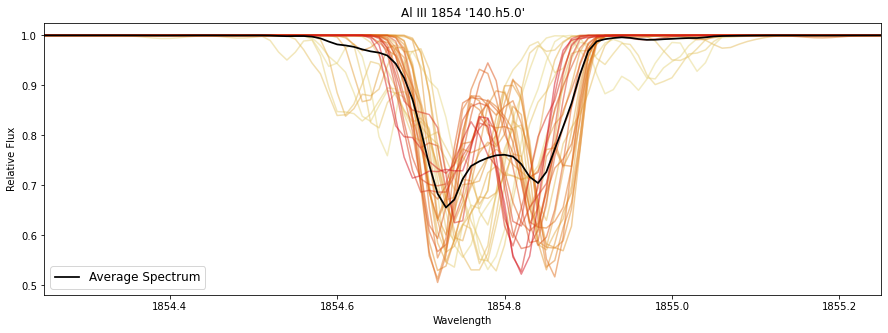

In [21]:
AlIII = spec_avg(1.06,0.35,0.495,1.06,0.6,0.495, 10,3, 'Al III 1854',1854.25,1855.25,
                el='Al', rom_num='III', lrest=1854.72, gamma=5.57E+08, f_value=5.75E-01, 
                amu=26.98,DIY=True)

## Fe II 2600

yt : [INFO     ] 2022-02-08 15:39:54,144 Getting segment at z = 0.0: [0.53   0.175  0.2475] unitary to [0.53   0.3    0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 15:39:54,145 Getting subsegment: [0.5300000000000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5300000000000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:39:54,766 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:39:54,846 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:39:54,846 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:39:54,847 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:39:54,847 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 15:39:59,408 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:39:59,408 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:39:59,409 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:39:59,409 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:39:59,409 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:39:59,411 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:39:59,422 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:39:59,427 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:39:59,519 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:39:59,522 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2072

yt : [INFO     ] 2022-02-08 15:40:04,040 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:40:04,128 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:40:04,131 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2082.61it/s]
yt : [INFO     ] 2022-02-08 15:40:04,191 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:40:04,204 Getting segment at z = 0.0: [0.53585938 0.175      0.25140625] unitary to [0.53585938 0.3        0.25140625] unitary.
yt : [INFO     ] 2022-02-08 15:40:04,205 Getting subsegment: [0.5358593750000001 unitary, 0.175 unitary, 0.25140625 unitary] to [0.5358593750000001 unitary, 0.3 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 15:40:04,850 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:40:04,930 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:40:04,931 Parameters: 

yt : [INFO     ] 2022-02-08 15:40:09,240 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:40:09,315 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:40:09,316 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:40:09,316 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:40:09,316 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:40:09,317 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:40:09,317 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:40:09,327 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:40:09,331 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:40:09,416 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:40:09,419 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 15:40:13,680 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:40:13,690 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:40:13,693 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:40:13,778 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:40:13,781 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 65/65 [00:00<00:00, 2230.23it/s]
yt : [INFO     ] 2022-02-08 15:40:13,839 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:40:13,851 Getting segment at z = 0.0: [0.54367188 0.175      0.24945312] unitary to [0.54367188 0.3        0.24945312] unitary.
yt : [INFO     ] 2022-02-08 15:40:13,852 Getting subsegment: [0.543671875 unitary, 0.175 unitary, 0.249453125 unitary] to [0.543671875 unitary, 0.3 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 15:40:14,455 Saving field data to yt dat

yt : [INFO     ] 2022-02-08 15:40:18,263 Getting subsegment: [0.5475781250000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5475781250000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:40:18,893 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:40:18,969 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:40:18,970 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:40:18,970 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:40:18,970 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:40:18,971 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:40:18,972 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:40:18,982 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:40:18,

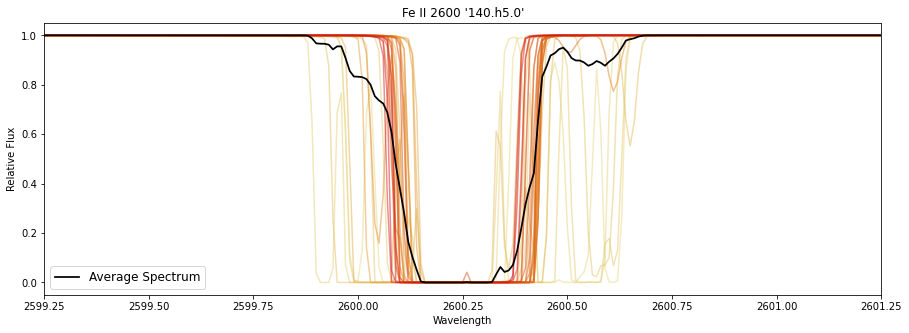

In [23]:
FeII = spec_avg(1.06,0.35,0.495,1.06,0.6,0.495, 10,3, 'Fe II 2600',2599.25, 2601.25,
                el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, 
                amu=55.85,DIY=True)

## Mg II 2796

yt : [INFO     ] 2022-02-08 15:40:22,027 Getting segment at z = 0.0: [0.53   0.175  0.2475] unitary to [0.53   0.3    0.2475] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 15:40:22,029 Getting subsegment: [0.5300000000000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5300000000000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:40:22,671 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:40:22,747 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:40:22,748 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:40:22,748 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:40:22,748 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 15:40:27,409 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:40:27,410 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:40:27,410 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:40:27,411 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:40:27,411 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:40:27,412 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:40:27,422 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:40:27,426 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:40:27,516 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:40:27,519 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 65/65 [00:00<00:00, 1538

yt : [INFO     ] 2022-02-08 15:40:31,972 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:40:32,060 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:40:32,063 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 65/65 [00:00<00:00, 1580.28it/s]
yt : [INFO     ] 2022-02-08 15:40:32,134 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:40:32,146 Getting segment at z = 0.0: [0.53585938 0.175      0.25140625] unitary to [0.53585938 0.3        0.25140625] unitary.
yt : [INFO     ] 2022-02-08 15:40:32,147 Getting subsegment: [0.5358593750000001 unitary, 0.175 unitary, 0.25140625 unitary] to [0.5358593750000001 unitary, 0.3 unitary, 0.25140625 unitary].
yt : [INFO     ] 2022-02-08 15:40:32,788 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:40:32,868 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:40:32,868 Parameters: 

yt : [INFO     ] 2022-02-08 15:40:37,372 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:40:37,449 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:40:37,450 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:40:37,450 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:40:37,450 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:40:37,451 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:40:37,452 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:40:37,461 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:40:37,466 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:40:37,550 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:40:37,553 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 15:40:42,052 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:40:42,062 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:40:42,066 Identified 5.700e+01 octs
yt : [INFO     ] 2022-02-08 15:40:42,153 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 15:40:42,156 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 65/65 [00:00<00:00, 1822.92it/s]
yt : [INFO     ] 2022-02-08 15:40:42,220 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 15:40:42,232 Getting segment at z = 0.0: [0.54367188 0.175      0.24945312] unitary to [0.54367188 0.3        0.24945312] unitary.
yt : [INFO     ] 2022-02-08 15:40:42,233 Getting subsegment: [0.543671875 unitary, 0.175 unitary, 0.249453125 unitary] to [0.543671875 unitary, 0.3 unitary, 0.249453125 unitary].
yt : [INFO     ] 2022-02-08 15:40:42,865 Saving field data to yt dat

yt : [INFO     ] 2022-02-08 15:40:46,753 Getting subsegment: [0.5475781250000001 unitary, 0.175 unitary, 0.24750000000000003 unitary] to [0.5475781250000001 unitary, 0.3 unitary, 0.24750000000000003 unitary].
yt : [INFO     ] 2022-02-08 15:40:47,362 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 15:40:47,438 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 15:40:47,438 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 15:40:47,439 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 15:40:47,439 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 15:40:47,439 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 15:40:47,440 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 15:40:47,450 Allocating for 6.500e+01 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 15:40:47,

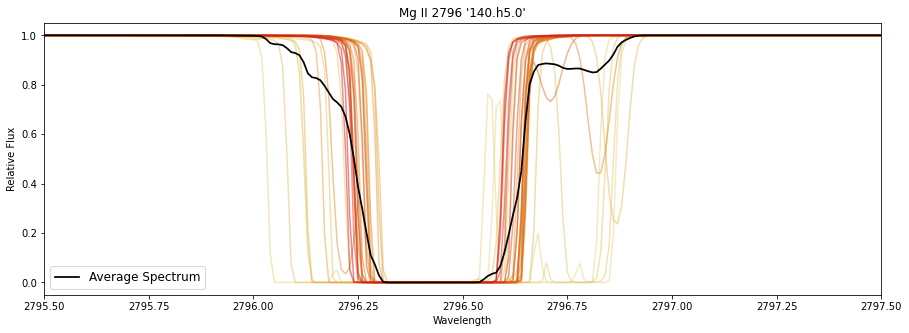

In [24]:
MgII = spec_avg(1.06,0.35,0.495,1.06,0.6,0.495, 10,3, 'Mg II 2796',2795.5, 2797.5,
                el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, 
                amu=24.31,DIY=True)